<a href="https://colab.research.google.com/github/Peckkie/AIprototype2022_kie/blob/main/Cloud_DB_and_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install azure-data-tables

     |████████████████████████████████| 108 kB 24.0 MB/s 
     |████████████████████████████████| 85 kB 3.2 MB/s 
     |████████████████████████████████| 178 kB 46.8 MB/s 
     |████████████████████████████████| 41 kB 450 kB/s 


# Azure Table (Clound DB)

1. create DB on Azure Portal
2. insert data
3. query data

https://docs.microsoft.com/en-us/azure/cosmos-db/table/how-to-use-python

In [2]:
from azure.data.tables import TableServiceClient
from azure.data.tables import TableEntity

In [4]:
#Creating the Table service client from a connection string
table_service = TableServiceClient.from_connection_string(conn_str='DefaultEndpointsProtocol=https;AccountName=aiprototype2;AccountKey=4HKFeDJSOD0nT13cdDT4BYyblr4QY/YpJIIMtDj5wUFae7xIRzDtH2ISuPwzW+UIBDO3FsvWeYxPel5KgN+exg==;EndpointSuffix=core.windows.net')

## insert data

In [5]:
table_client = table_service.get_table_client(table_name="testDB")

In [6]:
#create entity

task = TableEntity()
task[u'PartitionKey'] = u'tasksSeattle' #PartitionKey:  secondary key  ข้อมูลเเต่ละ Partition จะแยกกันเก็บ และ แยกกันค้นหา จะง่ายขึ้นในการ
task[u'RowKey'] = u'002'  #RowKey:  ห้ามซ้ำ primary key
task[u'name'] = u'stat'
task[u'age'] = 30
table_client.create_entity(task)

{'date': datetime.datetime(2022, 2, 8, 2, 46, 17, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T02%3A46%3A18.0652653Z\'"',
 'version': '2019-02-02'}

In [9]:
#create Dictionary

task = {u'PartitionKey': u'tasksSeattle', u'RowKey': u'001',
        u'name': u'python', u'room': u'Online', u'age': 3}
table_client.create_entity(entity=task)

{'date': datetime.datetime(2022, 2, 8, 2, 50, 53, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T02%3A50%3A53.8592757Z\'"',
 'version': '2019-02-02'}

In [10]:
# Replace the entity created earlier
task = {u'PartitionKey': u'part2', u'RowKey': u'001',
        u'name': u'python', u'room': u'Online', u'age': 3}
table_client.upsert_entity(task)

{'date': datetime.datetime(2022, 2, 8, 3, 9, 37, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T03%3A09%3A38.4124049Z\'"',
 'version': '2019-02-02'}

In [14]:
task = {u'PartitionKey': u'part3', u'RowKey': u'002',
        u'name': u'C++', u'room': u'Onsite', u'age': 5}
table_client.create_entity(entity=task)

{'date': datetime.datetime(2022, 2, 8, 3, 13, 33, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T03%3A13%3A33.2934644Z\'"',
 'version': '2019-02-02'}

In [15]:
for i in range(10):
    task = {u'PartitionKey': u'partQ', u'RowKey': f'00{i+10}',
        u'name': u'python', u'room': u'Online', u'age': i}
    table_client.create_entity(entity=task)

## query data

In [13]:
# Query for an entity
# Query by partition and row keys

task = table_client.get_entity('part2', '001')
print(task['name'])
print(task['room'])

python
Online


In [12]:
# Query by partition and row keys
tasks = table_client.query_entities(query_filter="PartitionKey eq 'part2'")

print(task['name'])
print(task['room'])

python
Online


## query by logic 

In [20]:
tasks = table_client.query_entities(query_filter="age gt 2")
for t in tasks:
    print(t)

{'PartitionKey': 'part2', 'RowKey': '001', 'age': 3, 'name': 'python', 'room': 'Online'}
{'PartitionKey': 'part3', 'RowKey': '002', 'name': 'C++', 'room': 'Onsite', 'age': 5}
{'PartitionKey': 'partQ', 'RowKey': '0013', 'name': 'python', 'room': 'Online', 'age': 3}
{'PartitionKey': 'partQ', 'RowKey': '0014', 'name': 'python', 'room': 'Online', 'age': 4}
{'PartitionKey': 'partQ', 'RowKey': '0015', 'name': 'python', 'room': 'Online', 'age': 5}
{'PartitionKey': 'partQ', 'RowKey': '0016', 'name': 'python', 'room': 'Online', 'age': 6}
{'PartitionKey': 'partQ', 'RowKey': '0017', 'name': 'python', 'room': 'Online', 'age': 7}
{'PartitionKey': 'partQ', 'RowKey': '0018', 'name': 'python', 'room': 'Online', 'age': 8}
{'PartitionKey': 'partQ', 'RowKey': '0019', 'name': 'python', 'room': 'Online', 'age': 9}
{'PartitionKey': 'tasksSeattle', 'RowKey': '001', 'name': 'python', 'room': 'Online', 'age': 3}
{'PartitionKey': 'tasksSeattle', 'RowKey': '002', 'name': 'stat', 'age': 30}


# Cloud AI
https://docs.microsoft.com/en-us/python/api/overview/azure/cognitiveservices-vision-computervision-readme?view=azure-python

In [1]:
!pip install azure-cognitiveservices-vision-computervision

In [4]:
#Create client

from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

# import os
# region = os.environ['southeastasia'] # ACCOUNT_REGION
# key = os.environ['be201be7b3fb491bab5fd2b63857afca'] # ACCOUNT_KEY

credentials = CognitiveServicesCredentials('be201be7b3fb491bab5fd2b63857afca')
client = ComputerVisionClient(
    endpoint="https://testkiekku.cognitiveservices.azure.com/",
    credentials=credentials
)

In [48]:
url = "https://aiprototype2.blob.core.windows.net/pics/E_kUwryUYAIsLJV.jpg"

image_analysis = client.analyze_image(url,visual_features=[VisualFeatureTypes.faces, VisualFeatureTypes.description])

for tag in image_analysis.faces:
    print(tag)

{'additional_properties': {}, 'age': 21, 'gender': <Gender.female: 'Female'>, 'face_rectangle': <azure.cognitiveservices.vision.computervision.models._models_py3.FaceRectangle object at 0x7eff6caaced0>}


In [49]:
for each_cap in image_analysis.description.captions: # เพิ่ม VisualFeatureTypes.description
    print(each_cap)

{'additional_properties': {}, 'text': 'a woman wearing a grey hoodie and a grey sweater', 'confidence': 0.35580360889434814}


In [18]:
print(tag.face_rectangle.width, tag.face_rectangle.height, tag.face_rectangle.left, tag.face_rectangle.top)

349 349 316 447


In [30]:
import cv2 
# import matplotlib  as plt
import matplotlib.pyplot as plt

In [ ]:
cv2.rectangle(image, (x1, y1), (x2, y2), (255,0,0), 2)

In [38]:
x1 =tag.face_rectangle.left
y1 = tag.face_rectangle.top
x2 = tag.face_rectangle.left+ tag.face_rectangle.width
y2 =  tag.face_rectangle.top + tag.face_rectangle.height

age: 21
Gender.female


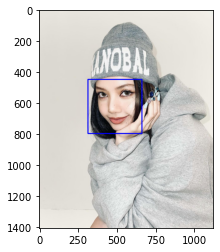

In [43]:
path = '/content/E_kUwryUYAIsLJV.jpg'
image = cv2.imread(path)
# image =cv2.rectangle(image, (x1, y1), (x2, y2), (255,0,0), 2)
image = cv2.rectangle(image, (x1, y1), (x2, y2), (255,0,0), 5)
print('age:', tag.age)
print(tag.gender)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 


In [45]:
for each_cap in image_analysis.description.captions:
    print(each_cap)

AttributeError: ignored

In [20]:
import cv2 
   
# path 
path = '/content/E_kUwryUYAIsLJV.jpg'
   
# Reading an image in default mode
image = cv2.imread(path)
   
# Window name in which image is displayed
window_name = 'Image'

start_point = (5, 5)
  
# Ending coordinate, here (220, 220)
# represents the bottom right corner of rectangle
end_point = (220, 220)
  
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
image = cv2.rectangle(image, start_point, end_point, color, thickness)
  
# Displaying the image 
cv2.imshow(window_name, image) 

DisabledFunctionError: ignored